<a href="https://colab.research.google.com/github/iamasifiqbal/ML_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw_data = pd.read_csv("/content/1.04. Real-life example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [ ]:
raw_data.describe(include="all") # We will see the all columns description

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
data = raw_data.drop(["Model"], axis = 1)
data.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
data_no_mv = data.dropna(axis = 0) # Removing the NUll record from the dataset using dropna()
data_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Plot the Data Column to see the Distribution

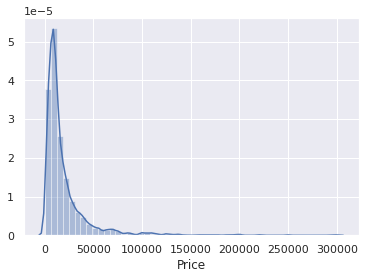

In [ ]:
sns.distplot(data_no_mv["Price"])

#Dearling With Outliner
### We use quantile method to remove top 1% of the Dataset

In [ ]:
q = data_no_mv['Price'].quantile(.99)
data_1 = data_no_mv[data_no_mv["Price"] < q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


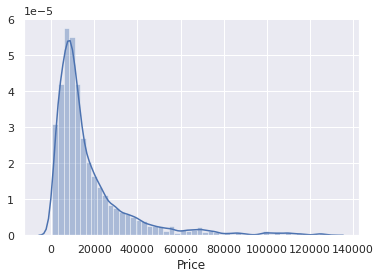

In [ ]:
sns.distplot(data_1["Price"]) # Data Distributed same way but there are less outlier

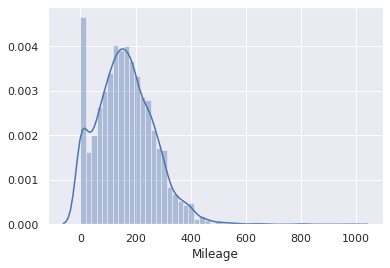

In [ ]:
sns.distplot(data_no_mv['Mileage'])

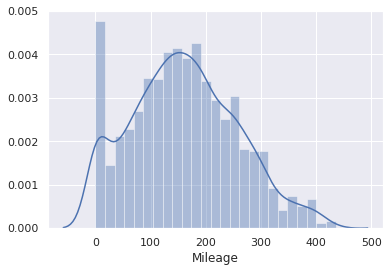

In [ ]:
q = data_1['Mileage'].quantile(.99)
data_2 = data_1[data_1["Mileage"] < q]
sns.distplot(data_2["Mileage"])

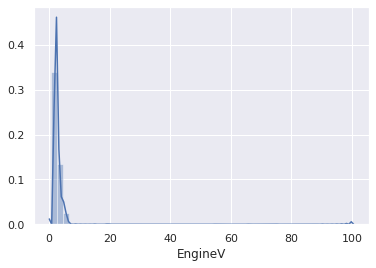

In [ ]:
sns.distplot(data_no_mv['EngineV'])

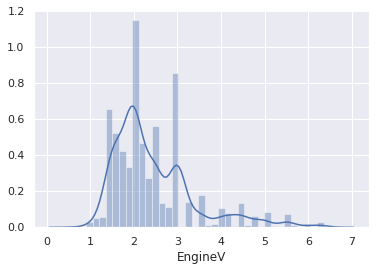

In [ ]:
data_3 = data_2[data_2["EngineV"]<6.6]
sns.distplot(data_3['EngineV'])

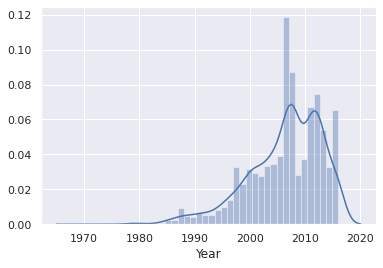

In [ ]:
sns.distplot(data_no_mv['Year'])

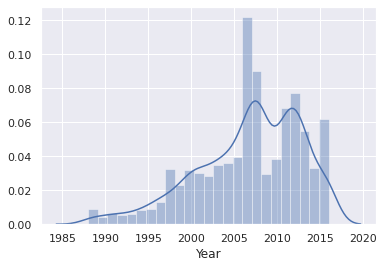

In [ ]:
q = data_3["Year"].quantile(.01)
data_4 = data_3[data_3["Year"] > q]
sns.distplot(data_4['Year'])

In [ ]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3868.000000,3868.000000,3868.000000,3868.000000
mean,18198.929708,160.542399,2.451487,2006.710186
std,19085.415722,95.620925,0.951474,6.103116
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.500000,2016.000000


#Checking our OLS method

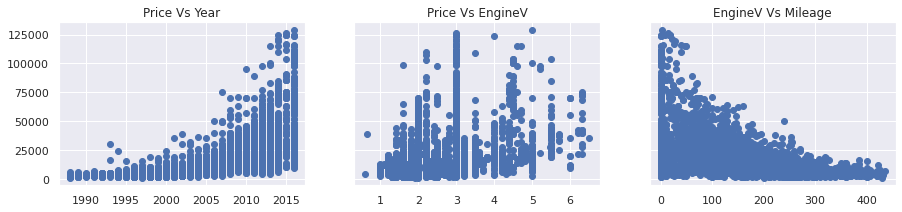

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True,  figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned["Price"])
ax1.set_title("Price Vs Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned["Price"])
ax2.set_title("Price Vs EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned["Price"])
ax3.set_title("EngineV Vs Mileage")

plt.show()

# There we can't see any linearity
## So we will use log() fucntion to get some linearity

In [ ]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["Log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3864,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3865,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3866,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


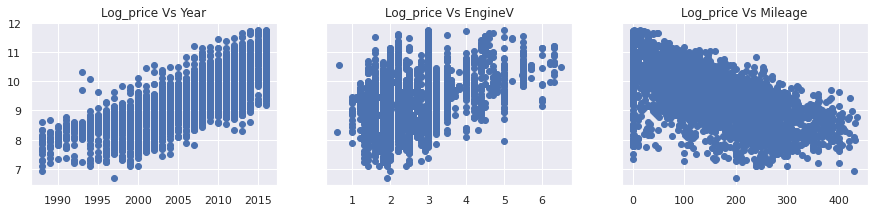

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True,  figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned["Log_price"])
ax1.set_title("Log_price Vs Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned["Log_price"])
ax2.set_title("Log_price Vs EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned["Log_price"])
ax3.set_title("Log_price Vs Mileage")

plt.show()

In [ ]:
data_cleaned = data_cleaned.drop(["Price"] , axis = 1)

# Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage" , "Year" , "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Featured"]  = variables.columns

In [ ]:
vif

,VIF,Featured
0,3.792300,Mileage
1,10.332226,Year
2,7.638286,EngineV


In [ ]:
data_no_multicollinearity = data_cleaned.drop(["Year"] , axis =1)

#Create Dummy Variables

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Rearrange  A bit

In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = [  'Log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

### Declare the input and targets

In [ ]:
targets = data_preprocessed["Log_price"]
inputs = data_preprocessed.drop(['Log_price'],axis = 1)

#Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
input_scaled = scaler.transform(inputs)

#Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(inputs, targets , test_size = .2, random_state = 365)

#Create the Regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = reg.predict(x_test)

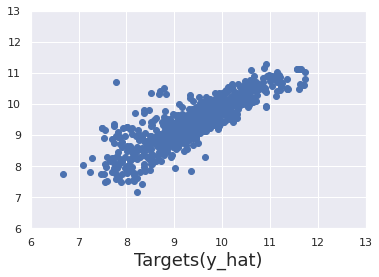

In [ ]:
plt.scatter(y_test, y_hat)
plt.xlabel("Targets(y_test)", size= 18)
plt.xlabel("Targets(y_hat)", size= 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
reg.score(x_train, y_train)

0.7583866949948946

## Finding the Weight and Bias

In [ ]:
reg.coef_

array([-0.00479363,  0.2230179 ,  0.03443622,  0.03177743, -0.52188877,
       -0.58213555, -0.1936388 , -0.22672424, -0.58296784, -0.33666393,
       -0.40048289, -0.41140529, -0.44872005, -0.34179423, -0.19790772,
       -0.31447625,  1.09825442])

In [ ]:
reg.intercept_

9.317279999655621

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summary['Weights'] = reg.coef_ 
reg_summary

,Features,Weights
0,Mileage,-0.004794
1,EngineV,0.223018
2,Brand_BMW,0.034436
3,Brand_Mercedes-Benz,0.031777
4,Brand_Mitsubishi,-0.521889
5,Brand_Renault,-0.582136
6,Brand_Toyota,-0.193639
7,Brand_Volkswagen,-0.226724
8,Body_hatch,-0.582968
9,Body_other,-0.336664


##Testing
